In [94]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading train dataset
train_data = pd.read_csv('SalaryData_Train.csv')
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Loading test dataset
test_data = pd.read_csv('SalaryData_Test.csv')
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
train_data.shape


(30161, 14)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [8]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [10]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
train_data.duplicated().sum()

3258

In [13]:
duplicated_rows = train_data[train_data.duplicated()]


In [14]:
duplicated_rows

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [17]:
duplicate_rows = train_data[train_data.duplicated(keep='last')]


In [18]:
duplicate_rows

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
12,23,Private,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
16,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
19,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
25,19,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,49,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29243,18,Private,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K
29293,30,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
29537,36,Private,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
29940,32,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [19]:
# Removing the duplicate rows
train_data.drop_duplicates(inplace=True)


In [22]:
duplicated_rows = test_data[test_data.duplicated()]


In [23]:
duplicated_rows

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [24]:
test_data.drop_duplicates(inplace=True)


In [28]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
label_encoder = LabelEncoder()
for column in columns_to_encode:
    train_data[column] = label_encoder.fit_transform(train_data[column])

In [29]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [30]:
train_data.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30160,52,3,11,9,2,3,5,4,0,15024,0,40,37,1


In [32]:
#for test data
from sklearn.preprocessing import LabelEncoder

columns_to_encode_test = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
label_encoder = LabelEncoder()
for column in columns_to_encode_test:
    test_data[column] = label_encoder.fit_transform(test_data[column])

In [33]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


##### Data visualization

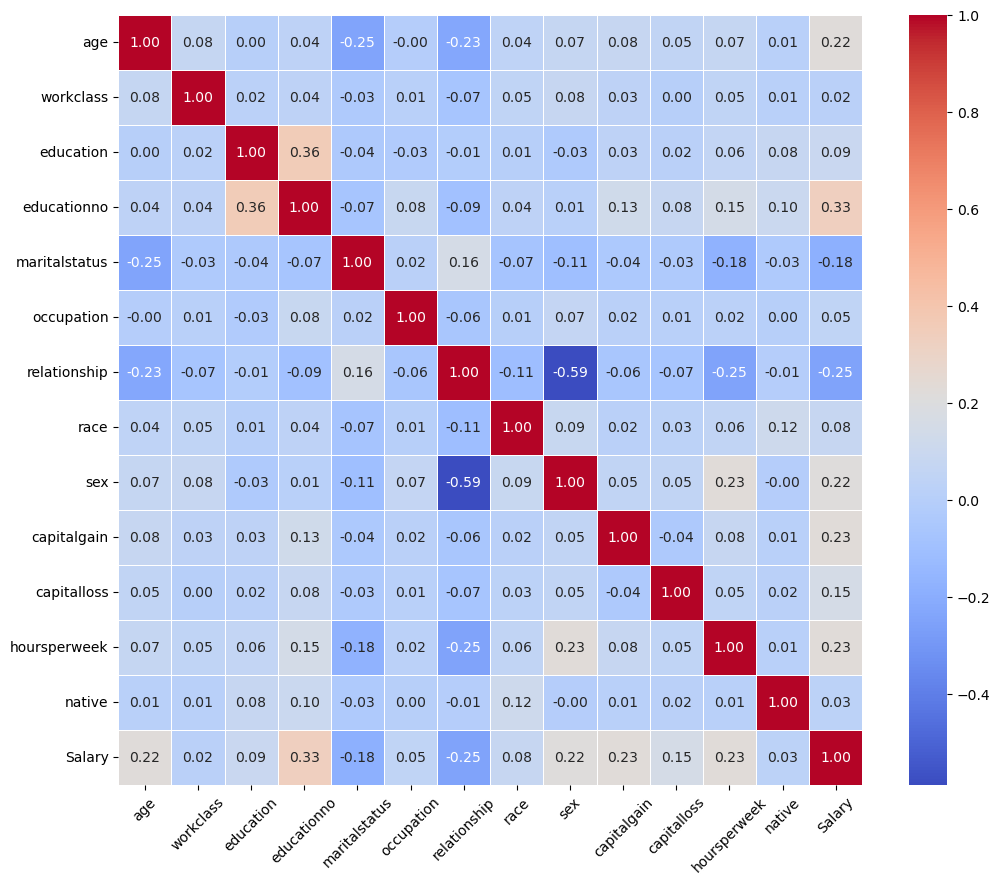

In [106]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.xticks(rotation=45)
plt.show()



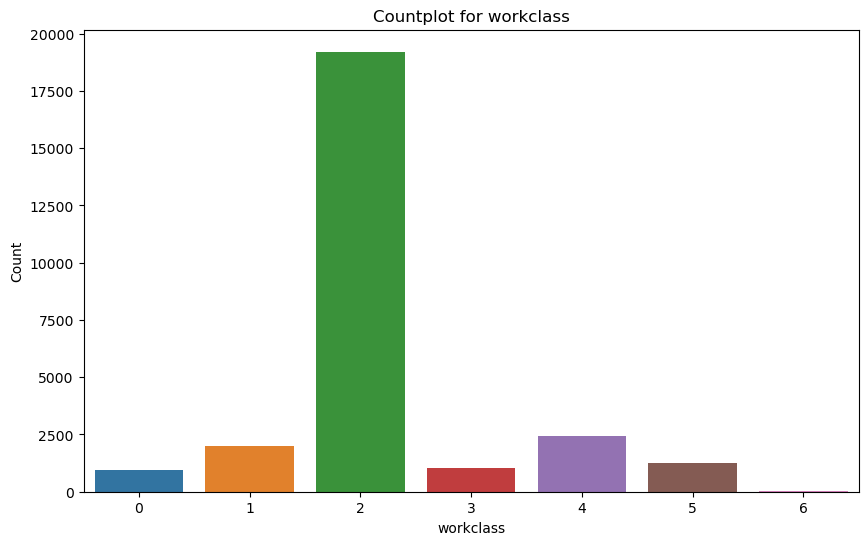

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', data=train_data)
plt.title('Countplot for workclass')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.show()


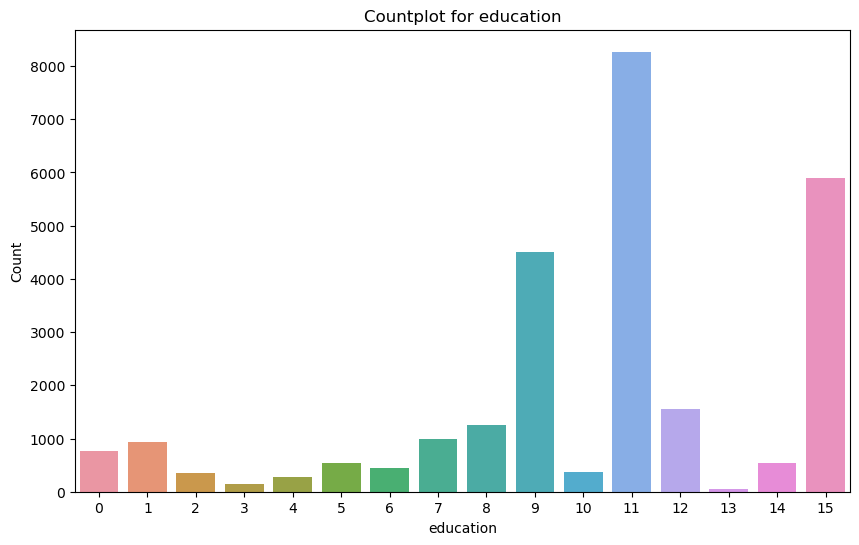

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education', data=train_data)
plt.title('Countplot for education')
plt.xlabel('education')
plt.ylabel('Count')
plt.show()


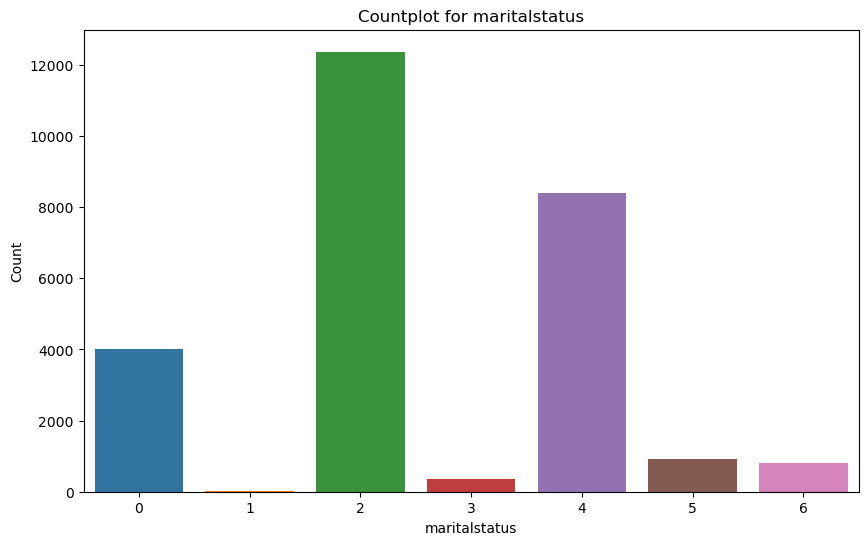

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='maritalstatus', data=train_data)
plt.title('Countplot for maritalstatus')
plt.xlabel('maritalstatus')
plt.ylabel('Count')
plt.show()


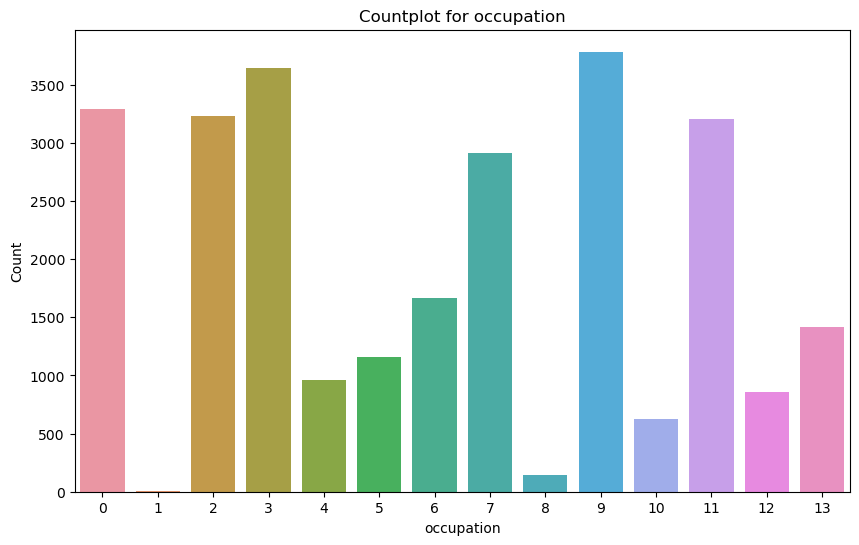

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation', data=train_data)
plt.title('Countplot for occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.show()


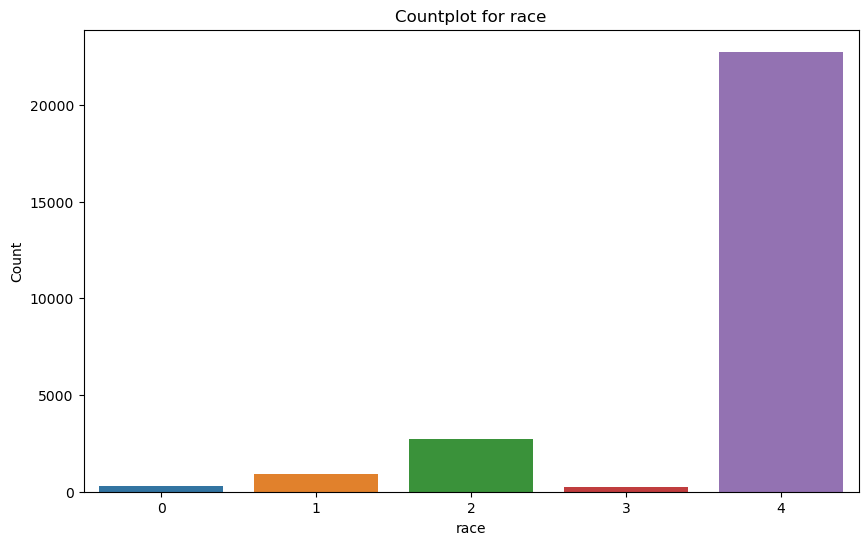

In [102]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=train_data)
plt.title('Countplot for race')
plt.xlabel('race')
plt.ylabel('Count')
plt.show()


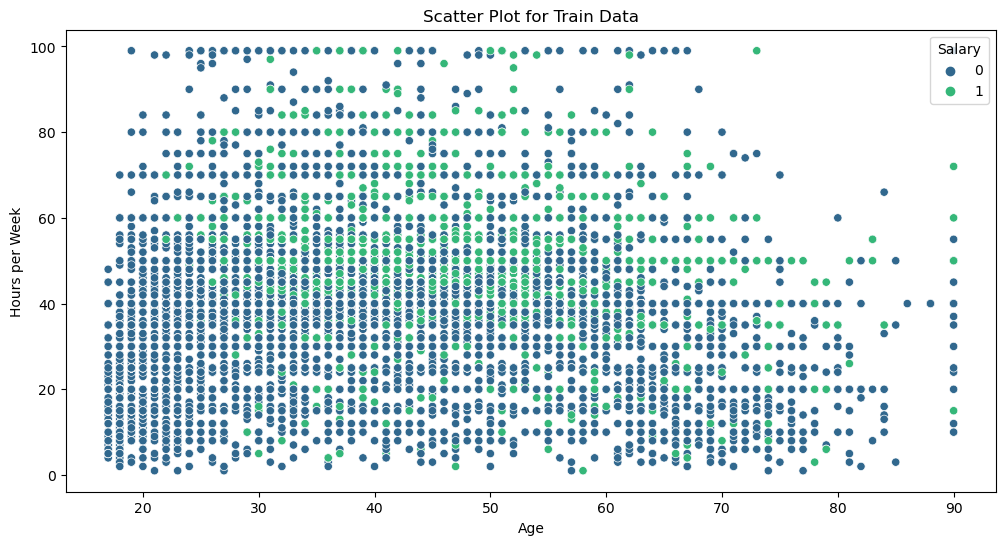

In [108]:
# Scatter plot for train data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hoursperweek', hue='Salary', data=train_data, palette='viridis')
plt.title('Scatter Plot for Train Data')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Salary', loc='upper right')
plt.show()

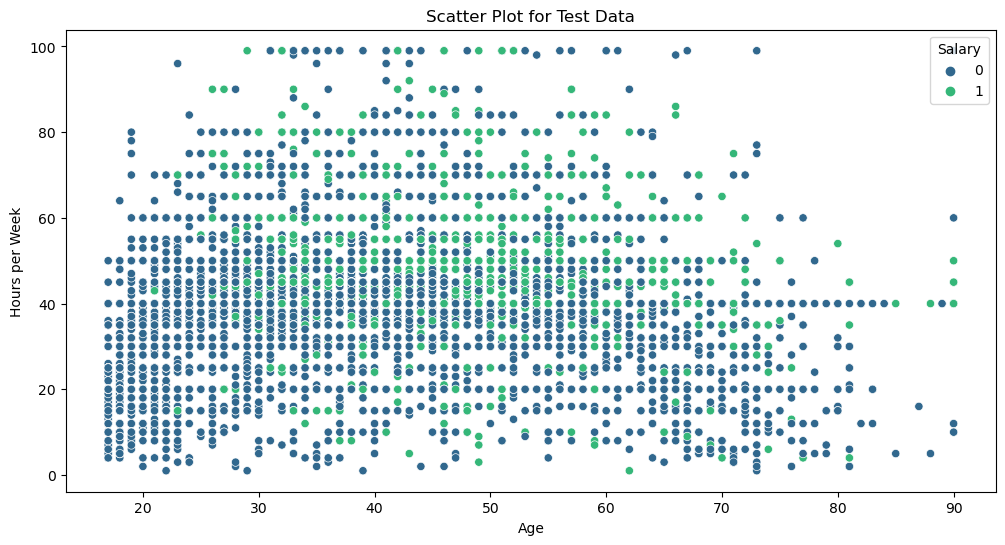

In [109]:
# Scatter plot for test data
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='hoursperweek', hue='Salary', data=test_data, palette='viridis')
plt.title('Scatter Plot for Test Data')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Salary', loc='upper right')
plt.show()

#### Data Transformation 

In [34]:
##Normalising the data as there is scale difference
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [35]:
Train_Data = norm_func(train_data)

In [36]:
Train_Data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718,0.0
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718,0.0
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718,0.0
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718,0.0
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564,0.0


In [37]:
Test_Data = norm_func(test_data)

In [38]:
Test_Data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718,0.0
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718,0.0
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718,1.0
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718,1.0
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718,0.0


#### Model Building

In [64]:
from sklearn.model_selection import train_test_split

Train_Column = Train_Data.columns
Test_Column = Test_Data.columns


In [65]:

# Splitting the training data into features (x_train) and target variable (y_train)
x_train = Train_Data[Train_Column[0:13]].values
y_train = Train_Data[Train_Column[13]].values


In [66]:
# Splitting the test data into features (x_test) and target variable (y_test)
x_test = Test_Data[Test_Column[0:13]].values
y_test = Test_Data[Test_Column[13]].values

In [67]:
# Using train_test_split to further split the training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [68]:
# Display the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (21522, 13)
y_train shape: (21522,)
x_test shape: (14130, 13)
y_test shape: (14130,)


In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

In [70]:
naive_bayes_model.fit(x_train, y_train)

GaussianNB()

In [87]:
y_val_pred = naive_bayes_model.predict(x_val)


#### Model Evaluation

In [89]:
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.8039397881434678


In [81]:
print("Classification Report (Validation):")
print(classification_report(y_val, y_val_pred))


Classification Report (Validation):
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      4032
         1.0       0.72      0.36      0.48      1349

    accuracy                           0.80      5381
   macro avg       0.77      0.66      0.68      5381
weighted avg       0.79      0.80      0.78      5381



In [90]:
print("Confusion Matrix (Validation):")
print(confusion_matrix(y_val, y_val_pred))

Confusion Matrix (Validation):
[[3838  194]
 [ 861  488]]


In [91]:
y_test_pred = naive_bayes_model.predict(x_test)

In [92]:
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.7967445152158528


In [93]:
print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))

Classification Report (Test):
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87     10620
         1.0       0.68      0.35      0.46      3510

    accuracy                           0.80     14130
   macro avg       0.75      0.65      0.67     14130
weighted avg       0.78      0.80      0.77     14130



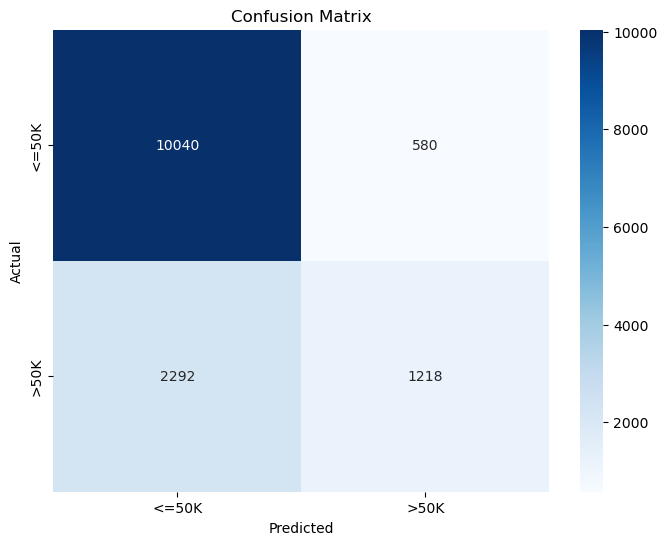

In [117]:
#confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels=['<=50K', '>50K']):
    cm = confusion_matrix(y_true.astype(int), y_pred.astype(int))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

#For test data
y_test_pred = naive_bayes_model.predict(x_test)
plot_confusion_matrix(y_test, y_test_pred)


In [118]:
# ROC curve
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

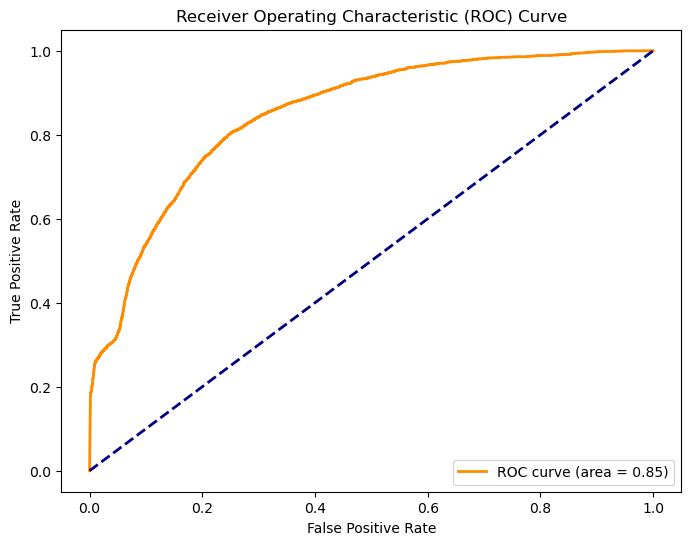

In [120]:
y_test_pred_proba = naive_bayes_model.predict_proba(x_test)[:, 1]
plot_roc_curve(y_test, y_test_pred_proba)